INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '../models/AR_BuzzLightyearPlanetRescue.pth', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff0e825a198>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Saving 'checkpoi

SystemExit: 

/home/benfen/.conda/envs/tensorflow_gpuenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3275: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


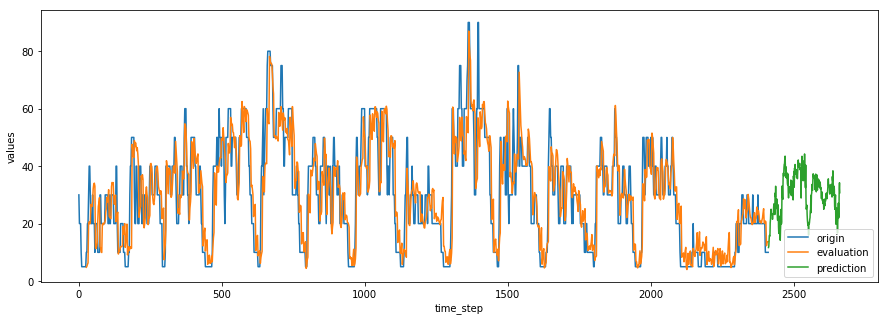

In [23]:
# coding: utf-8
from __future__ import print_function
import tensorflow as tf
import matplotlib.pyplot as plt

def main(_):
    
    csv_file_name = '../data/BuzzLightyearPlanetRescue.txt'
    reader = tf.contrib.timeseries.CSVReader(csv_file_name)
    train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(
        reader,batch_size = 4,window_size=16
    )

    with tf.Session() as sess:
        data = reader.read_full()
        coord = tf.train.Coordinator()
        tf.train.start_queue_runners(sess=sess, coord=coord)
        data = sess.run(data)
        coord.request_stop()

    ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200,input_window_size=12,output_window_size=4,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS,
        model_dir = u'../models/AR_BuzzLightyearPlanetRescue.pth'
    )

    ar.train(input_fn = train_input_fn,steps = 6000)

    evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
    evaluation = ar.evaluate(input_fn=evaluation_input_fn,steps = 1)

    (predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation,steps=250
        )
    ))

    plt.figure(figsize=(15,5))
    plt.plot(data['times'].reshape(-1),data['values'].reshape(-1),label=
    'origin')
    plt.plot(evaluation['times'].reshape(-1),evaluation['mean'].reshape(-1),
    label='evaluation')
    plt.plot(predictions['times'].reshape(-1),
    predictions['mean'].reshape(-1),label='prediction')
    plt.xlabel('time_step')
    plt.ylabel('values')
    plt.legend(loc=4)
    #plt.savefig('predict_result.jpg')

if __name__ == '__main__':
    tf.logging.set_verbosity(tf.logging.INFO)
    tf.app.run()